In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans



ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [14]:
df= pd.load_csv("banking.csv")

AttributeError: module 'pandas' has no attribute 'load_csv'

In [16]:
df=pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [17]:
import seaborn as sb

<AxesSubplot:xlabel='pdays', ylabel='Density'>

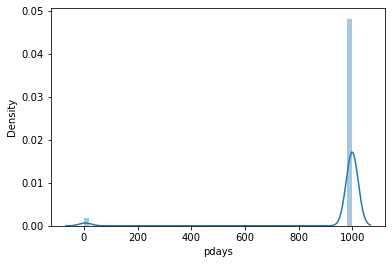

In [25]:
sb.distplot(df.pdays)

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,27,1,1,0,1,2,0,0,1,2,...,0,26,0,1,9,13,17,307,10,0
1,36,9,1,7,0,0,0,0,7,0,...,0,26,0,1,7,11,7,267,9,0
2,11,4,2,6,0,2,0,0,4,2,...,2,6,2,2,4,20,13,59,1,1
3,22,7,1,3,0,0,0,0,0,0,...,1,26,0,1,3,10,3,221,6,0
4,38,5,1,0,0,2,0,0,1,0,...,0,3,1,2,2,0,22,116,5,1


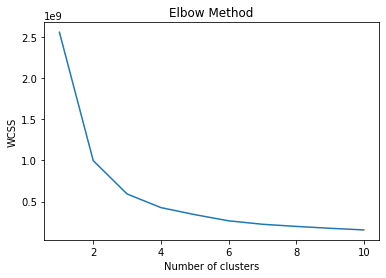

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(df)
labels = kmeans.labels_

y = kmeans.fit_predict(df)
y

array([3, 3, 0, ..., 3, 0, 3])

array([[2.30343972e+01, 3.70109145e+00, 1.18199107e+00, 3.72887382e+00,
        1.97453283e-01, 1.08136266e+00, 3.18008930e-01, 3.59517116e-01,
        4.33727468e+00, 2.04167356e+00, 2.99276914e+02, 1.24499752e+00,
        2.48106499e+01, 2.24739540e-01, 9.42037374e-01, 6.17521085e+00,
        1.39970233e+01, 1.05214983e+01, 2.43570862e+02, 7.35604432e+00,
        1.38581115e-01],
       [2.26464857e+01, 3.57411273e+00, 1.19554628e+00, 3.71398747e+00,
        2.05984690e-01, 1.03966597e+00, 3.56297843e-01, 3.37508699e-01,
        4.14126653e+00, 2.02922756e+00, 1.11919624e+03, 1.53375087e+00,
        2.51858038e+01, 1.50313152e-01, 9.54766875e-01, 6.66875435e+00,
        1.44015310e+01, 9.93667363e+00, 2.57311065e+02, 7.92414753e+00,
        5.90814196e-01],
       [2.32664570e+01, 3.73511570e+00, 1.17906089e+00, 3.65198832e+00,
        2.04223770e-01, 1.04425972e+00, 3.11840036e-01, 3.30262862e-01,
        4.23949674e+00, 2.03976634e+00, 6.06017749e+02, 1.33700292e+00,
        2.4985

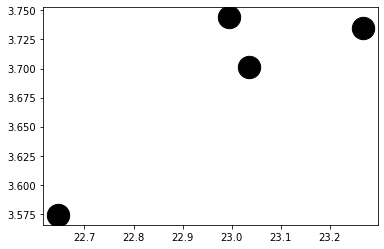

In [60]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);

centers

In [41]:
print(centers)

[[2.30343972e+01 3.70109145e+00 1.18199107e+00 3.72887382e+00
  1.97453283e-01 1.08136266e+00 3.18008930e-01 3.59517116e-01
  4.33727468e+00 2.04167356e+00 2.99276914e+02 1.24499752e+00
  2.48106499e+01 2.24739540e-01 9.42037374e-01 6.17521085e+00
  1.39970233e+01 1.05214983e+01 2.43570862e+02 7.35604432e+00
  1.38581115e-01]
 [2.26464857e+01 3.57411273e+00 1.19554628e+00 3.71398747e+00
  2.05984690e-01 1.03966597e+00 3.56297843e-01 3.37508699e-01
  4.14126653e+00 2.02922756e+00 1.11919624e+03 1.53375087e+00
  2.51858038e+01 1.50313152e-01 9.54766875e-01 6.66875435e+00
  1.44015310e+01 9.93667363e+00 2.57311065e+02 7.92414753e+00
  5.90814196e-01]
 [2.32664570e+01 3.73511570e+00 1.17906089e+00 3.65198832e+00
  2.04223770e-01 1.04425972e+00 3.11840036e-01 3.30262862e-01
  4.23949674e+00 2.03976634e+00 6.06017749e+02 1.33700292e+00
  2.49856212e+01 1.91642328e-01 9.50572905e-01 6.46079533e+00
  1.42417434e+01 9.98876657e+00 2.51542575e+02 7.67602786e+00
  3.26668164e-01]
 [2.29947858e+01

In [42]:
plt.scatter(kmeans)

TypeError: scatter() missing 1 required positional argument: 'y'

In [46]:
print(labels)
plt.scatter(df[:,0], df[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

[3 3 0 ... 3 0 3]


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [61]:
from sklearn.datasets.samples_generator import make_blobs

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'